In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import librosa
import librosa.display

In [2]:
def readDir(dirname, Fs = 16000):
    audio_files = glob(dirname + '/*.wav')
    x = []

    for t in range(0,len(audio_files),1):
        x1 = load_audio(audio_files[t],Fs)

        time = np.arange(0,len(x1),1)/Fs
        clip = []
        c1 = 0
        c2 = 10
        for j in range(0,len(time),1):
            k = time[j]
            if ((k>=c1) and (k<c2)):
                clip.append(x1[j])
            else:
                clip = np.array(clip)
                x.append(clip)
                clip = []
                clip.append(x1[j])
                c1 += 10
                c2 += 10
        n = len(x[0])
        if len(clip):
            if n!= len(clip):
                for i in range(0,n-len(clip),1):
                    clip.append(0)
            clip = np.array(clip)
            x.append(clip)

    return x 

In [3]:
def load_audio(filename, Fs = 16000):
    x, sfreq = librosa.load(filename,sr = Fs)
    
    return x

In [5]:
def audio2mfcc(x, n_mfcc = 20, Fs = 16000):
    X = []
    for i in range(0,len(x),1):
        mfccs = librosa.feature.mfcc(x[i],sr = Fs, n_mfcc = n_mfcc)
        X.append(mfccs.flatten())
    return np.array(X)

In [6]:
Fs = 16000 # Sampling Frequency
n_mfcc = 20
x_music = readDir('music', Fs) 
x_speech = readDir('speech', Fs)

# Represetation of Audio Signal

This is the representation of speech and music signals each split into a 10-sec clips

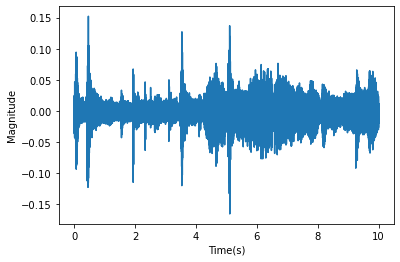

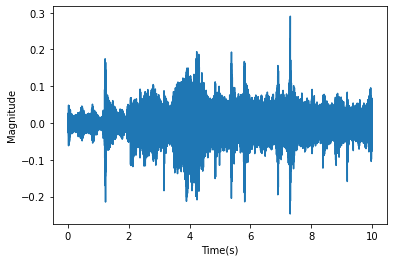

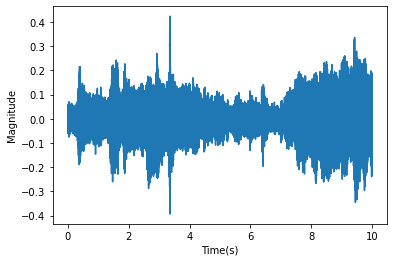

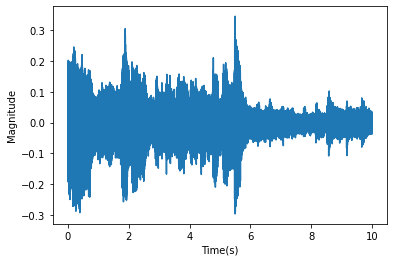

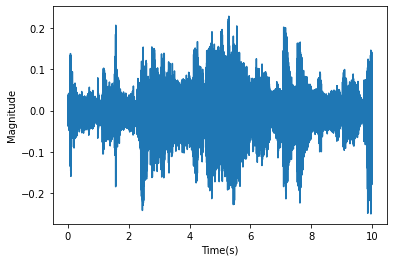

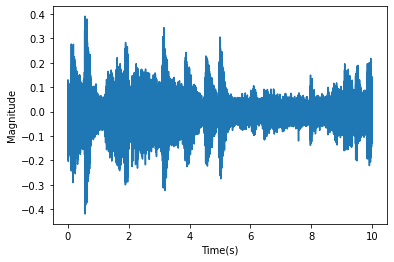

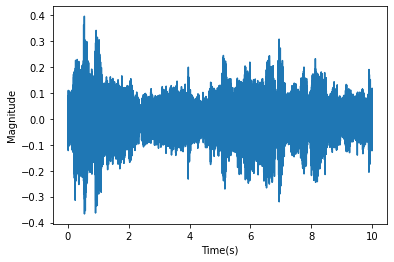

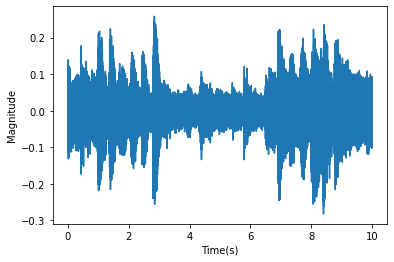

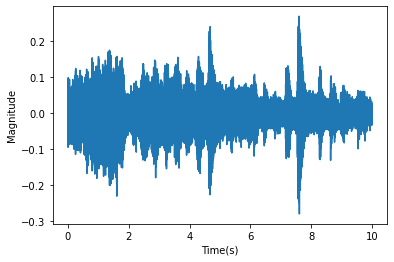

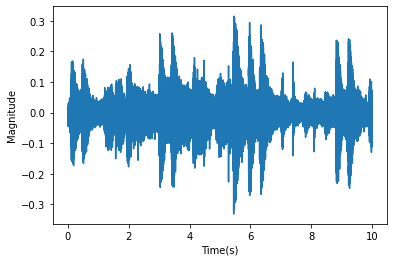

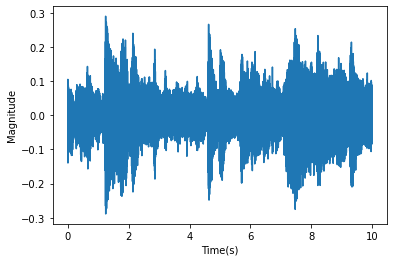

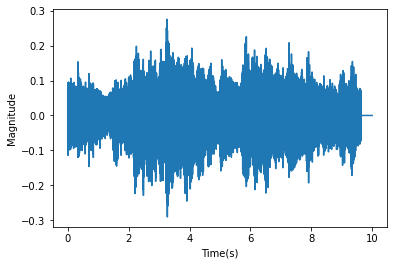

In [7]:
for i in range(0,len(x_music),1):
    time = np.arange(0,len(x_music[i]))/Fs
    fig, ax = plt.subplots()
    ax.plot(time,x_music[i])
    ax.set(xlabel = "Time(s)", ylabel = "Magnitude")
    plt.show()

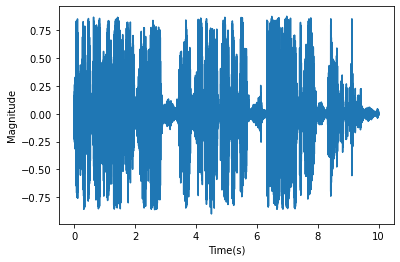

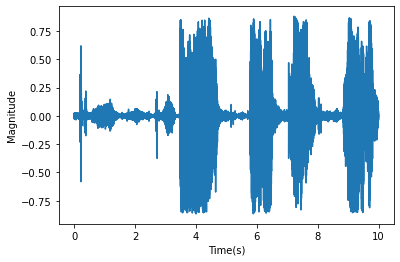

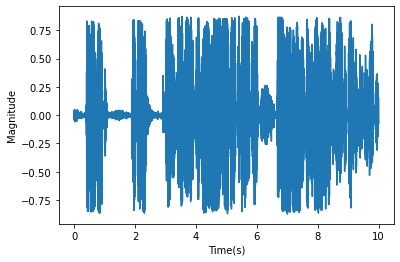

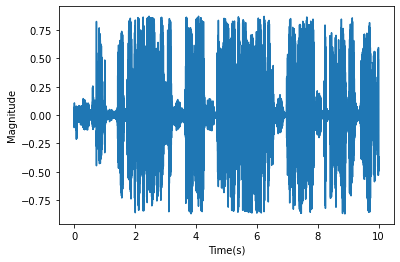

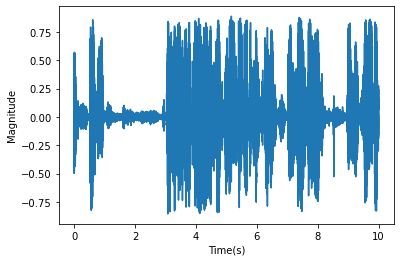

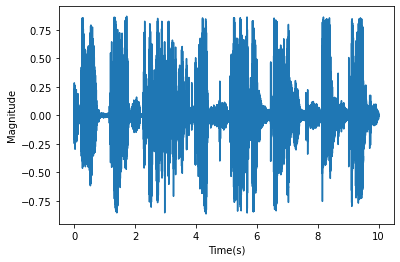

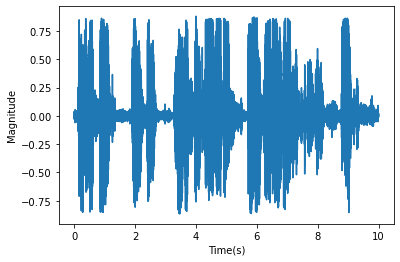

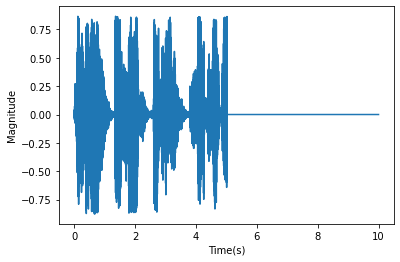

In [8]:
for i in range(0,len(x_speech),1):
    time = np.arange(0,len(x_speech[i]))/Fs
    fig, ax = plt.subplots()
    ax.plot(time,x_speech[i])
    ax.set(xlabel = "Time(s)", ylabel = "Magnitude")
    plt.show()

# Audio Signal Processing

## Fourier Transformation

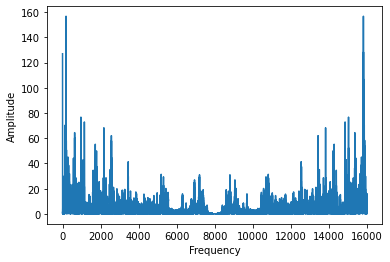

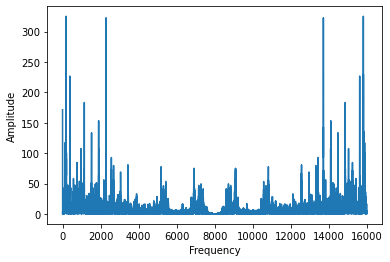

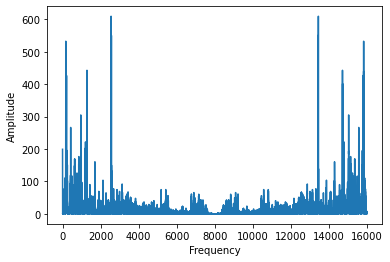

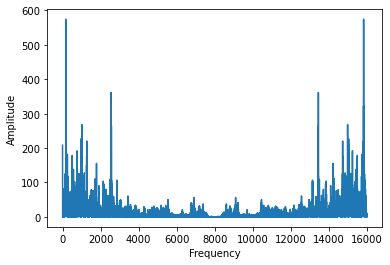

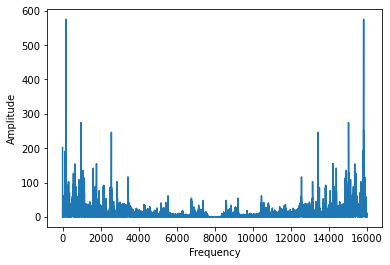

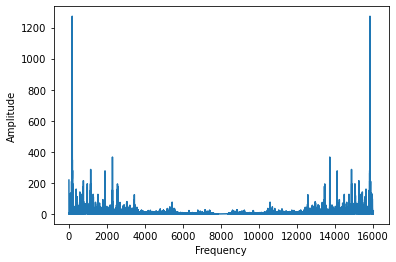

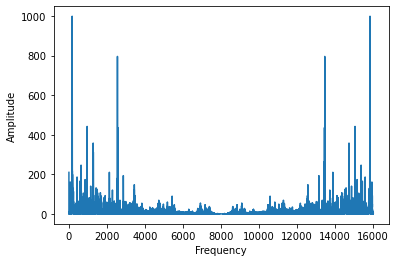

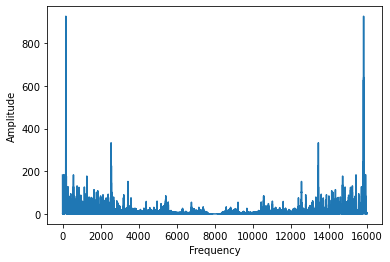

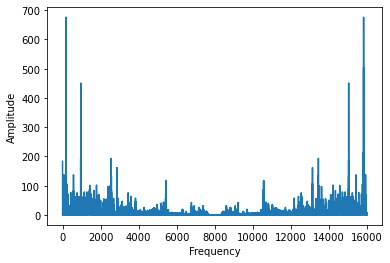

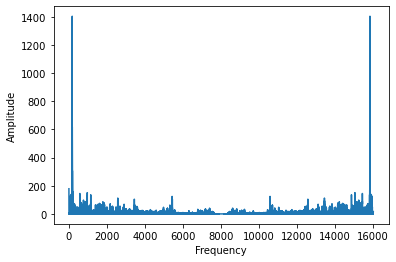

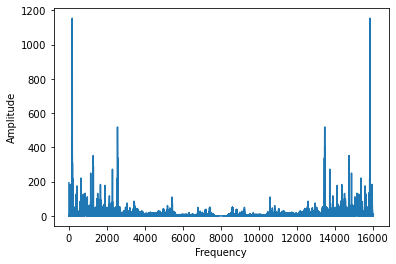

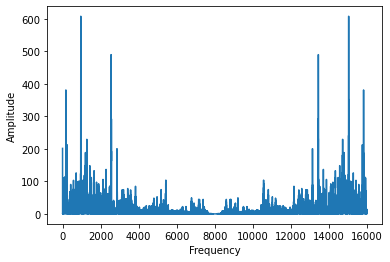

In [9]:
for i in range(0,len(x_music),1):
    fft = np.fft.fft(x_music[i])
    magnitude = np.abs(fft)
    frequency = np.linspace(0,Fs,len(magnitude))
    plt.plot(frequency,magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()

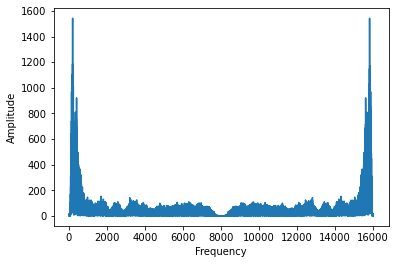

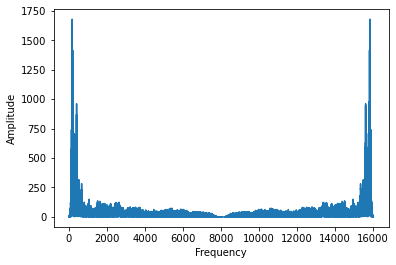

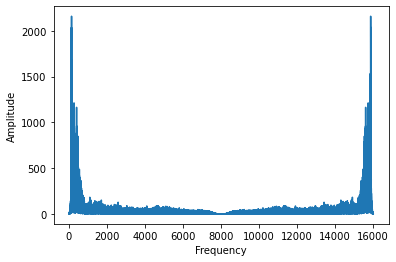

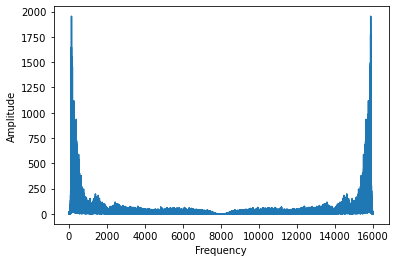

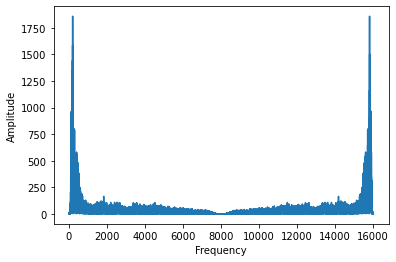

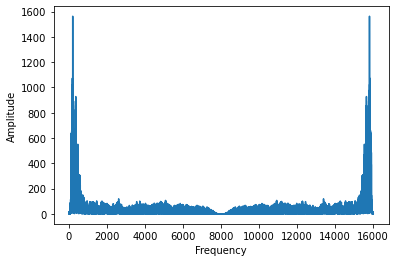

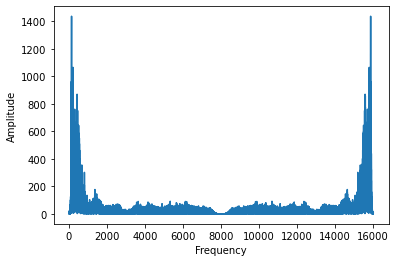

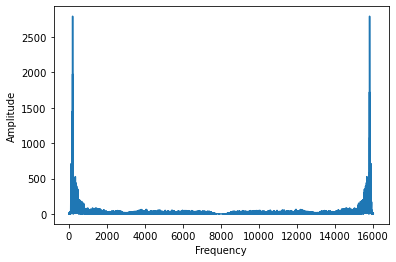

In [10]:
for i in range(0,len(x_speech),1):
    fft = np.fft.fft(x_speech[i])
    magnitude = np.abs(fft)
    frequency = np.linspace(0,Fs,len(magnitude))
    plt.plot(frequency,magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()

## Spectrogram

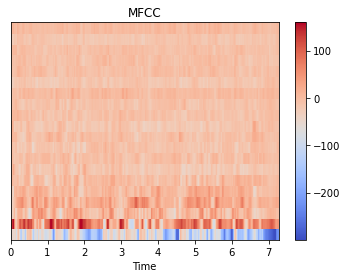

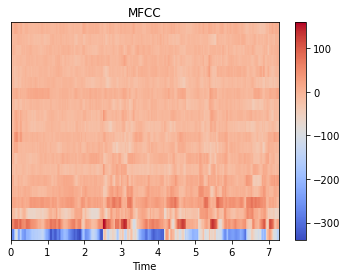

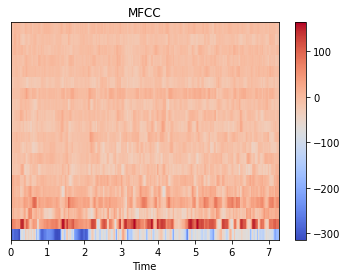

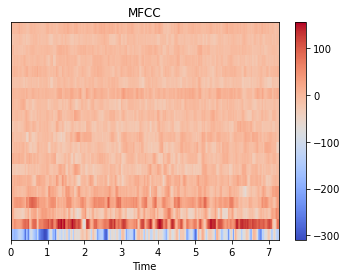

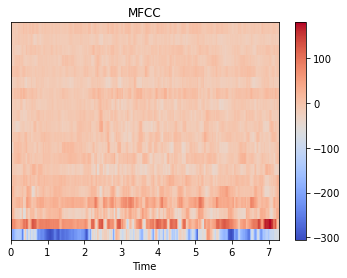

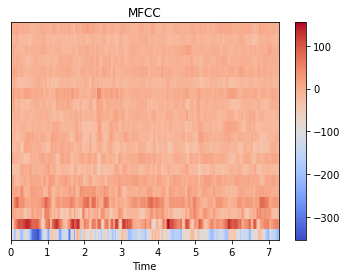

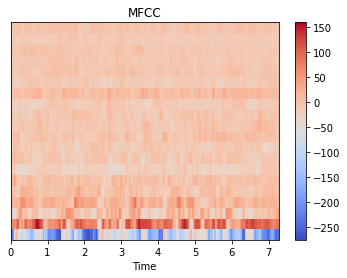

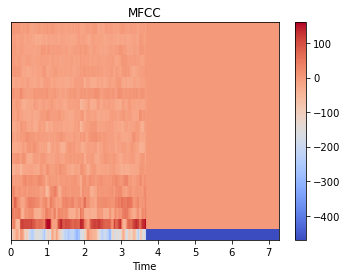

In [11]:
for i in range(0,len(x_speech)):
    mfccs = librosa.feature.mfcc(x_speech[i], sr=Fs, n_mfcc = 20)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')

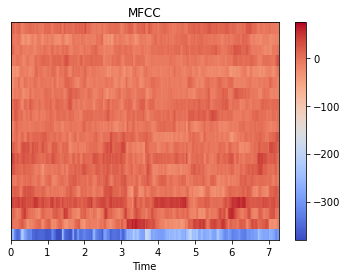

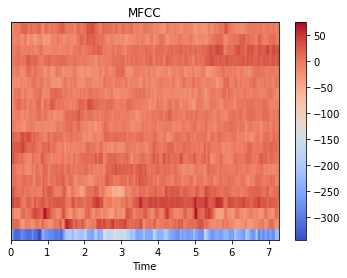

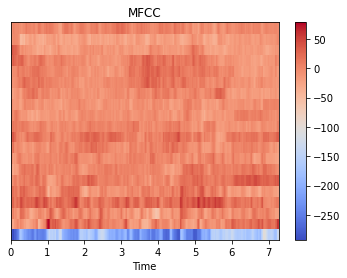

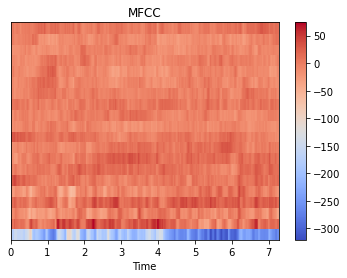

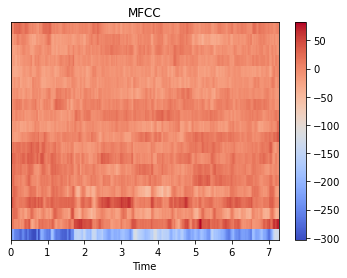

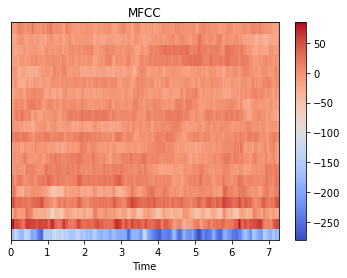

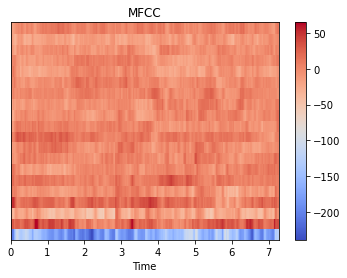

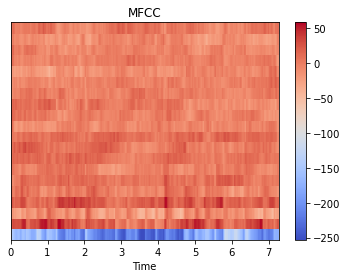

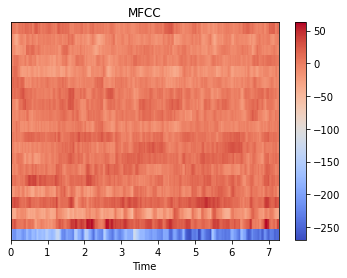

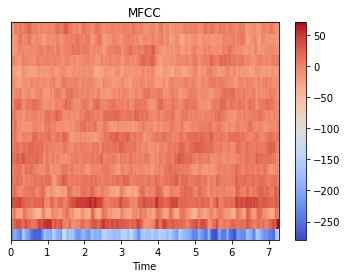

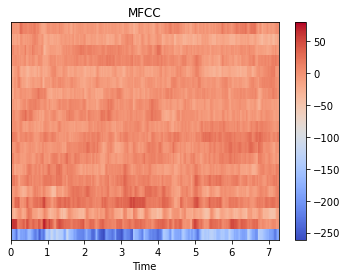

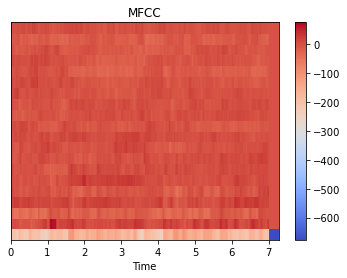

In [12]:
for i in range(0,len(x_music)):
    mfccs = librosa.feature.mfcc(x_music[i], sr=Fs, n_mfcc = 20)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')